In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('Dataset .csv')

In [4]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
data.shape

(9551, 21)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [10]:
data=data.drop(['Restaurant ID','Address','Locality','Locality Verbose','Has Table booking','Is delivering now', 'Switch to order menu','Rating color', 'Rating text'],axis=1)


In [11]:
data.columns

Index(['Restaurant Name', 'Country Code', 'City', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Online delivery',
       'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

In [12]:
data.head()

,Restaurant Name,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Online delivery,Price range,Aggregate rating,Votes
0,Le Petit Souffle,162,Makati City,121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),No,3,4.8,314
1,Izakaya Kikufuji,162,Makati City,121.014101,14.553708,Japanese,1200,Botswana Pula(P),No,3,4.5,591
2,Heat - Edsa Shangri-La,162,Mandaluyong City,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),No,4,4.4,270
3,Ooma,162,Mandaluyong City,121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,4,4.9,365
4,Sambo Kojin,162,Mandaluyong City,121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),No,4,4.8,229


In [13]:
X = data.drop('Aggregate rating', axis=1)
y = data['Aggregate rating']

In [14]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Createing preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [15]:
# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Createing and fit the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Country Code', 'Longitude', 'Latitude', 'Average Cost for two',
       'Price range', 'Votes'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Restaurant Name', 'City', 'Cuisines', 'Currency',
       'Has Online delivery'],
      dtype='object'))])),
                ('model', RandomForestRegressor(random_state=42))])

In [16]:
# Predictions on the testing set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.08682265672422818


In [17]:
y_pred

array([3.198, 3.437, 3.047, ..., 3.008, 4.148, 4.14 ])

In [18]:
y_test

4731    2.1
1468    4.1
9037    3.2
7866    4.4
5570    3.5
       ... 
8149    2.6
5849    0.0
9019    3.1
742     4.2
180     4.3
Name: Aggregate rating, Length: 1911, dtype: float64

In [19]:
from sklearn.metrics import r2_score,accuracy_score
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

R-squared: 0.9618547894262204


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

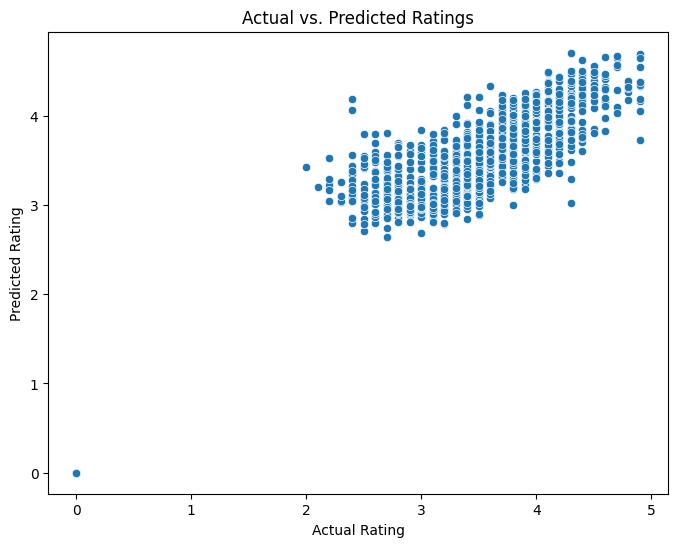

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Ratings')
plt.show()

<ipython-input-22-c704e056ba8b>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='Actual', shade=True)
<ipython-input-22-c704e056ba8b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, label='Predicted', shade=True)


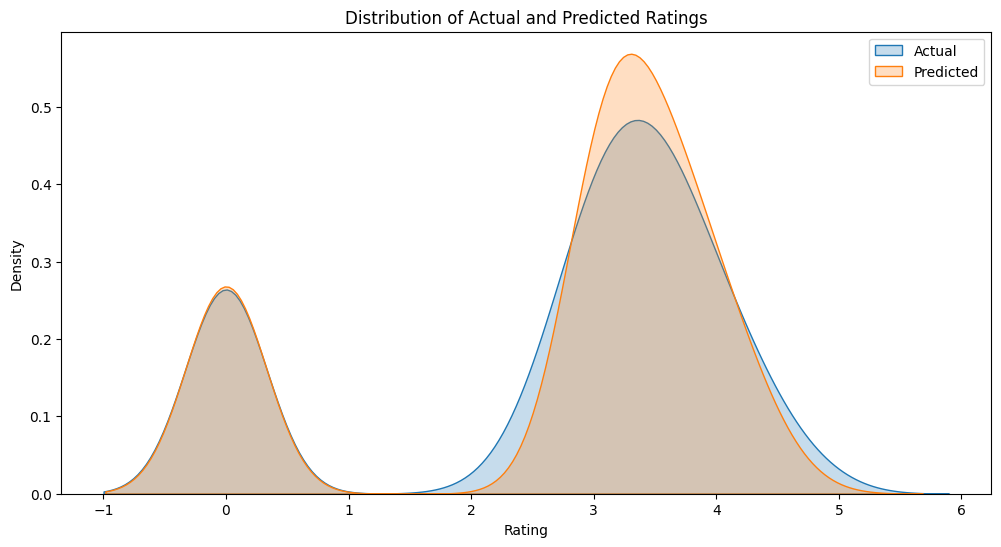

In [22]:
plt.figure(figsize=(12, 6))
sns.kdeplot(y_test, label='Actual', shade=True)
sns.kdeplot(y_pred, label='Predicted', shade=True)
plt.xlabel('Rating')
plt.ylabel('Density')
plt.title('Distribution of Actual and Predicted Ratings')
plt.legend()
plt.show()

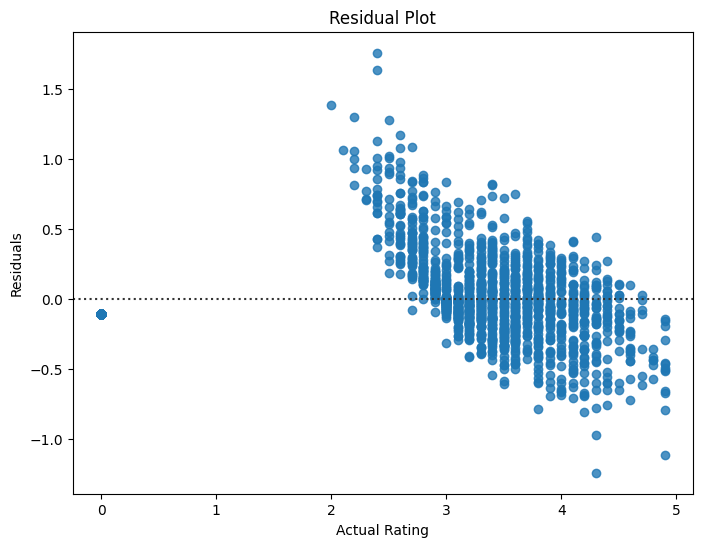

In [23]:
plt.figure(figsize=(8, 6))
sns.residplot(x=y_test,y= y_pred)
plt.xlabel('Actual Rating')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()